### This is the simple workflow with graph

# from here phase- 1

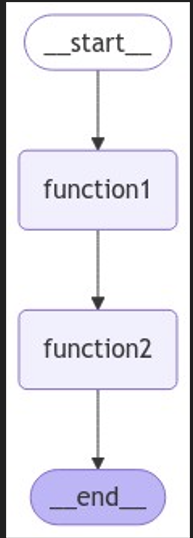

##### 1️⃣ Refactor Your Functions

In [1]:
def function3(input3: str) -> str:
    return input3

def function1(input1: str) -> str:
    return input1 + " from first function"

def function2(input2: str) -> str:
    output = function3("this is function 2 in between")
    return input2 + " " + output + " and Nipun from second function"


##### 2️⃣ Define the State Schema

In [2]:
from typing import TypedDict

class WorkflowState(TypedDict):
    input: str
    output: str


##### 3️⃣ Build the StateGraph

In [3]:
from langgraph.graph import StateGraph

# Create the state graph
workflow = StateGraph(WorkflowState)

# Define node wrappers
def node_function1(state: WorkflowState) -> WorkflowState:
    result = function1(state["input"])
    return {"input": state["input"], "output": result}

def node_function2(state: WorkflowState) -> WorkflowState:
    result = function2(state["output"])
    return {"input": state["input"], "output": result}

# Add nodes
workflow.add_node("function1", node_function1)
workflow.add_node("function2", node_function2)

# Connect edges
workflow.add_edge("function1", "function2")

# Set entry & finish points
workflow.set_entry_point("function1")
workflow.set_finish_point("function2")

# Compile the app
app = workflow.compile()


#### 4️⃣ Visualize the Workflow

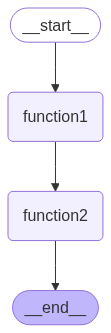

In [4]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)


##### 5️⃣ Invoke and Stream Results

In [5]:
# Run once
result = app.invoke({"input": "hi this is Chamindu", "output": ""})
print(result["output"])

# Stream intermediate results
for step in app.stream({"input": "hi this is chamindu ", "output": ""}):
    for key, value in step.items():
        print(f"--- Output from {key} ---")
        print(value)
        print()


hi this is Chamindu from first function this is function 2 in between and Nipun from second function
--- Output from function1 ---
{'input': 'hi this is chamindu ', 'output': 'hi this is chamindu  from first function'}

--- Output from function2 ---
{'input': 'hi this is chamindu ', 'output': 'hi this is chamindu  from first function this is function 2 in between and Nipun from second function'}



### now explain the intermediate function

#### then come to the next workflow

# from here phase-2

### Now let's create a workflow with LLM

In [6]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")
llm.invoke("hi").content

'Hello! 👋  \n\nHow can I help you today? 😊\n'

In [7]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "all-MiniLM-L6-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity
embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
)


C:\Users\Acer NItro 5\AppData\Local\Temp\ipykernel_14000\2115495218.py:6: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceBgeEmbeddings(
d:\Project\AI\LangGraph\Lanchain_and_Langgraph\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### 1️⃣ Functions

In [8]:
from langchain_groq import ChatGroq  

def function1(input_text: str) -> str:
    llm = ChatGroq(model_name="Gemma2-9b-It")
    response = llm.invoke(input_text).content
    return response

def function2(input_text: str) -> str:
    return input_text.upper()


##### 2️⃣ Define the State Schema

In [9]:
from typing import TypedDict

class Workflow2State(TypedDict):
    input: str
    output: str


##### 3️⃣ Build a StateGraph

In [10]:
from langgraph.graph import StateGraph

workflow2 = StateGraph(Workflow2State)

# Node 1: LLM call
def node_function1(state: Workflow2State) -> Workflow2State:
    result = function1(state["input"])  # calls ChatGroq LLM
    return {"input": state["input"], "output": result}

# Node 2: Uppercase conversion
def node_function2(state: Workflow2State) -> Workflow2State:
    result = function2(state["output"])
    return {"input": state["input"], "output": result}

# Add nodes to the graph
workflow2.add_node("llm", node_function1)
workflow2.add_node("upper_string", node_function2)

# Connect nodes
workflow2.add_edge("llm", "upper_string")

# Set entry/finish points
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

# Compile the graph
app2 = workflow2.compile()


##### 4️⃣ Visualize the Graph

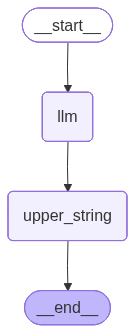

In [11]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)


##### 5️⃣ Invoke & Stream

In [12]:
# Direct invoke
result = app2.invoke({"input": "hi this is chamindu ", "output": ""})
print(result["output"])
# Expected:
# HI THIS IS SUNNY  FROM FIRST FUNCTION

# Stream intermediate nodes
for step in app2.stream({"input": "hi this is chamindu ", "output": ""}):
    for key, value in step.items():
        print(f"--- Output from {key} ---")
        print(value)
        print()


HI CHAMINDU! 👋

IT'S NICE TO MEET YOU. WHAT CAN I DO FOR YOU TODAY? 😊  

--- Output from llm ---
{'input': 'hi this is chamindu ', 'output': "Hi Chamindu! 👋\n\nIt's nice to meet you. What can I do for you today? 😊  \n\n"}

--- Output from upper_string ---
{'input': 'hi this is chamindu ', 'output': "HI CHAMINDU! 👋\n\nIT'S NICE TO MEET YOU. WHAT CAN I DO FOR YOU TODAY? 😊  \n\n"}



### this is a second tool which you will create in the end of this phase
#### Now lets create our output token counter

##### 1️⃣ Functions

In [13]:
from langchain_groq import ChatGroq

def function1(input_text: str) -> str:
    llm = ChatGroq(model_name="Gemma2-9b-It")
    response = llm.invoke(input_text).content
    return response

def function3(input_text: str) -> str:
    tokens = input_text.split()
    token_number = len(tokens)
    return f"total token number is {token_number}"


##### 2️⃣ Define the State Schema

In [14]:
class Workflow3State(TypedDict):
    input: str
    llm_output: str
    token_count: str


##### 3️⃣ Build the StateGraph

In [15]:
from langgraph.graph import StateGraph

workflow3 = StateGraph(Workflow3State)

# Node 1: LLM node
def node_function1(state: Workflow3State) -> Workflow3State:
    llm_result = function1(state["input"])
    return {"input": state["input"], "llm_output": llm_result, "token_count": ""}

# Node 2: Token counter
def node_function3(state: Workflow3State) -> Workflow3State:
    token_result = function3(state["llm_output"])
    return {"input": state["input"], "llm_output": state["llm_output"], "token_count": token_result}

# Add nodes
workflow3.add_node("llm", node_function1)
workflow3.add_node("token_counter", node_function3)

# Connect edges
workflow3.add_edge("llm", "token_counter")

# Set entry & finish points
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")

# Compile the graph
app3 = workflow3.compile()


##### 4️⃣ Visualize the Workflow

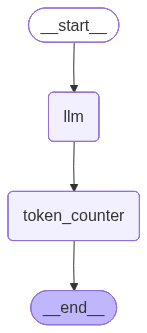

In [16]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)


##### 5️⃣ Invoke and Stream

In [17]:
result = app3.invoke({"input": "who is god of cricket?",
                      "llm_output": "", "token_count": ""})

print(f"Question: {result['input']}")
print(f"LLM Answer: {result['llm_output']}")
print(f"Token Count: {result['token_count']}")


Question: who is god of cricket?
LLM Answer: The title "God of Cricket" is widely attributed to **Sachin Tendulkar**, a legendary Indian cricketer. 

He is revered for his exceptional batting skills, incredible consistency, and immense contribution to the sport. His record-breaking achievements, unwavering dedication, and sportsmanship have earned him a god-like status in the hearts of millions of cricket fans worldwide. 


Token Count: total token number is 53


# from here phase-3

### Question: Can we integrating a RAG Pipeline?

### Answer: yes we can!

In [18]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings  # or use OpenAIEmbeddings

# Load text files with correct encoding
loader = DirectoryLoader(
    "../data2",
    glob="./*.txt",
    loader_cls=lambda path: TextLoader(path, encoding="utf-8")
)
docs = loader.load()

# Split into smaller chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs = text_splitter.split_documents(docs)
doc_strings = [doc.page_content for doc in new_docs]

# Initialize embeddings (HuggingFace)
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Store in Chroma
db = Chroma.from_documents(new_docs, embeddings)
retriever = db.as_retriever(search_kwargs={"k": 3})

# Query
query = "what is meta llama3?"
docs = retriever.get_relevant_documents(query)

print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)


C:\Users\Acer NItro 5\AppData\Local\Temp\ipykernel_14000\662820321.py:23: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


{'source': '..\\data2\\indian_economy.txt'}
or global market volatility that could impact growth.” The government has announced targeted fiscal
page_content='or global market volatility that could impact growth.” The government has announced targeted fiscal' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='strengthened ties and demand for Indian IT services and pharmaceuticals.' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='sector saw a 3.2% increase in output in January.' metadata={'source': '..\\data2\\indian_economy.txt'}


C:\Users\Acer NItro 5\AppData\Local\Temp\ipykernel_14000\662820321.py:31: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


In [19]:
for doc in docs:
    print(doc)

page_content='or global market volatility that could impact growth.” The government has announced targeted fiscal' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='strengthened ties and demand for Indian IT services and pharmaceuticals.' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='sector saw a 3.2% increase in output in January.' metadata={'source': '..\\data2\\indian_economy.txt'}


In [20]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

In [21]:
mydict={}

In [22]:
mydict

{}

In [23]:
mydict["messages"]="hi, how are you?"

In [24]:
mydict

{'messages': 'hi, how are you?'}

In [25]:
mydict["messages"]="hi, what are you doing?"

In [26]:
mydict

{'messages': 'hi, what are you doing?'}

In [27]:
AgentState={}

In [28]:
AgentState["messages"]=[]

In [29]:
AgentState["messages"].append("hi, how are you?")

In [30]:
AgentState

{'messages': ['hi, how are you?']}

In [31]:
AgentState["messages"].append("hi, what you doing?")

In [32]:
AgentState

{'messages': ['hi, how are you?', 'hi, what you doing?']}

In [33]:
AgentState["messages"][-1]

'hi, what you doing?'

## what is a work of agent state? 
### the work of AgentState is just pass the message to the next node

##### 1. Import Required Libraries

In [34]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List

##### 2. Load and Prepare Documents

In [35]:
loader = DirectoryLoader(
    "../data2",
    glob="./*.txt",
    loader_cls=lambda path: TextLoader(path, encoding="utf-8")
)
docs = loader.load()

# Split into chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=50,
    chunk_overlap=10
)
new_docs = text_splitter.split_documents(docs)

# Initialize embeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Store in Chroma
db = Chroma.from_documents(new_docs, embeddings)
retriever = db.as_retriever(search_kwargs={"k": 3})

##### 3. Initialize Global LLM

In [36]:
llm = ChatGroq(model_name="Gemma2-9b-It", temperature=0)

In [37]:
class AgentState(TypedDict):
    messages: List[str]

##### 4. Define State Schema

In [38]:
from typing import TypedDict, List

class AgentState(TypedDict):
    messages: List[str]


##### 5. Node 1: Quick LLM Answer

In [39]:
def function_1(state: AgentState) -> AgentState:
    question = state["messages"][-1]
    complete_prompt = (
        "Your task is to provide only a brief answer based on the user query. "
        "Don't include too much reasoning. Following is the user query: " + question
    )
    response = llm.invoke(complete_prompt)
    state["messages"].append(response.content)
    return state

##### 6. Node 2: RAG Retrieval + LLM

In [40]:
def function_2(state: AgentState) -> AgentState:
    question = state["messages"][0]  # take the original question

    # Get relevant docs and build context string
    context_docs = retriever.invoke(question)
    context = "\n\n".join([doc.page_content for doc in context_docs])

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    chain = prompt | llm | StrOutputParser()
    result = chain.invoke({"context": context, "question": question})

    state["messages"].append(result)
    return state

##### 7. Build and Compile the Graph


In [41]:
workflow4 = StateGraph(AgentState)
workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)

workflow4.add_edge(START, "LLM")
workflow4.add_edge("LLM", "RAGtool")
workflow4.add_edge("RAGtool", END)

app4 = workflow4.compile()

#####  8. Run the Workflow

In [42]:
initial_state = {"messages": ["Which sectors are driving India’s industrial growth in early 2024?"]}
result = app4.invoke(initial_state)

print("\n=== FINAL RESULT ===")
print(result)


=== FINAL RESULT ===
{'messages': ['Which sectors are driving India’s industrial growth in early 2024?', 'Manufacturing, services, and infrastructure.  \n', "The provided text does not specify which sectors are driving India's industrial growth in early 2024. \n"]}


In [43]:
initial_state = {"messages": ["who is god fo cricket?"]}
result = app4.invoke(initial_state)

print("\n=== FINAL RESULT ===")
print(result)


=== FINAL RESULT ===
{'messages': ['who is god fo cricket?', 'Sachin Tendulkar. \n', 'This document does not contain the answer to your question. \n\nIt discusses the Indian economy and mentions RBI Governor Shaktikanta Das.  There is no information about cricket or who is considered the "god of cricket". \n']}


In [44]:
initial_state = {"messages": ["What is Meta Llama 3?"]}
result = app4.invoke(initial_state)

print("User Question:", result["messages"][0])
print("LLM-only Answer:", result["messages"][1])
print("RAG-enhanced Answer:", result["messages"][2])


User Question: What is Meta Llama 3?
LLM-only Answer: Meta Llama 3 is an open-source large language model (LLM) developed by Meta.  

RAG-enhanced Answer: This document does not contain the answer to your question. 

It only mentions "vaccine production" and "retail".  There is no information about Meta Llama 3.  



In [45]:
initial_state = {"messages": ["what gdp value has 2021?"]}
result = app4.invoke(initial_state)

print("User Question:", result["messages"][0])
print("\nLLM-only Answer:", result["messages"][1])
print("RAG-enhanced Answer:", result["messages"][2])


User Question: what gdp value has 2021?

LLM-only Answer: I need to know which country's GDP you're asking about. 


RAG-enhanced Answer: $3,173.04B 



In [46]:
# ============================
# 1. Import Required Libraries
# ============================
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List, Union, Dict

# ============================
# 2. Load and Prepare Documents
# ============================
loader = DirectoryLoader(
    "../data2",
    glob="./*.txt",
    loader_cls=lambda path: TextLoader(path, encoding="utf-8")
)
docs = loader.load()

# Split into chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs = text_splitter.split_documents(docs)

# Initialize embeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Store in Chroma
db = Chroma.from_documents(new_docs, embeddings)
retriever = db.as_retriever(search_kwargs={"k": 3})

# ============================
# 3. Initialize Global LLM
# ============================
llm = ChatGroq(model_name="Gemma2-9b-It", temperature=0)

# ============================
# 4. Define State Schema
# ============================
class AgentState(TypedDict):
    messages: List[Union[str, Dict[str, str]]]  # messages can be raw string or stage-labeled dict

# ============================
# 5. Node 1: LLM Quick Answer
# ============================
def function_1(state: AgentState) -> AgentState:
    question = state["messages"][-1] if isinstance(state["messages"][-1], str) else state["messages"][-1]["answer"]
    complete_prompt = (
        "Your task is to provide only a brief answer based on the user query. "
        "Don't include too much reasoning. Following is the user query: " + question
    )
    response = llm.invoke(complete_prompt)

    # Append stage-labeled LLM answer
    state["messages"].append({"stage": "LLM", "answer": response.content})
    return state

# ============================
# 6. Node 2: RAG Retrieval + LLM
# ============================
def function_2(state: AgentState) -> AgentState:
    # Get the original question
    question = state["messages"][0] if isinstance(state["messages"][0], str) else state["messages"][0]["answer"]

    # Retrieve relevant documents
    context_docs = retriever.invoke(question)
    context = "\n\n".join([doc.page_content for doc in context_docs])

    # Build prompt
    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    # Run the chain
    chain = prompt | llm | StrOutputParser()
    result = chain.invoke({"context": context, "question": question})

    # Append stage-labeled RAG answer
    state["messages"].append({"stage": "RAG", "answer": result})
    return state

# ============================
# 7. Build and Compile the Graph
# ============================
workflow4 = StateGraph(AgentState)
workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)

workflow4.add_edge(START, "LLM")
workflow4.add_edge("LLM", "RAGtool")
workflow4.add_edge("RAGtool", END)

app4 = workflow4.compile()

# ============================
# 8. Run the Workflow
# ============================
initial_state = {"messages": ["Who is the God of cricket?"]}
result = app4.invoke(initial_state)

# ============================
# 9. Print Stage-Labeled Messages
# ============================
print("\n=== STAGE-LABELED MESSAGES ===")
for msg in result["messages"]:
    if isinstance(msg, dict):
        print(f"[{msg['stage']}] {msg['answer']}")
    else:
        print(f"[User Question] {msg}")



=== STAGE-LABELED MESSAGES ===
[User Question] Who is the God of cricket?
[LLM] Sachin Tendulkar. 

[RAG] This document does not contain the answer to your question. 



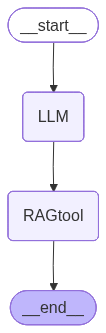

In [47]:
from IPython.display import Image, display

try:
    display(Image(app4.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [48]:
inputs = {"messages": ["Tell me about llama3 model"]}

In [49]:
inputs = {"messages": ["Tell me about llama3 model efficiency"]}

In [50]:
app4.invoke(inputs)

{'messages': ['Tell me about llama3 model efficiency',
  {'stage': 'LLM',
   'answer': 'Llama 3 models are known for their efficiency, offering competitive performance with fewer parameters compared to other large language models.  \n\n'},
  {'stage': 'RAG',
   'answer': 'This text does not contain information about the llama3 model efficiency. \n'}]}

In [51]:
inputs = {"messages": ["can you give me 3 property of llama3 model"]}

In [52]:
for output in app4.stream(inputs):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'LLM':
---
{'messages': ['can you give me 3 property of llama3 model', {'stage': 'LLM', 'answer': '1. Open-weights \n2. Text-only \n3. 7B parameter count  \n'}]}

---

Output from node 'RAGtool':
---
{'messages': ['can you give me 3 property of llama3 model', {'stage': 'LLM', 'answer': '1. Open-weights \n2. Text-only \n3. 7B parameter count  \n'}, {'stage': 'RAG', 'answer': 'The provided text does not contain information about the Llama3 model. Therefore, I cannot answer your question.  \n'}]}

---



# from here phase-4

In [53]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate

In [54]:
operator.add(10, 15)

25

In [55]:
operator.sub(10, 15)

-5

In [56]:
class AgentState(TypedDict):
    # The 'messages' field should be a sequence of strings, and we annotate it with 'operator.add'
    # This implies we might want to "add" new messages to the sequence later
    messages: Annotated[Sequence[BaseMessage], operator.add]

1. TypedDict:
- TypedDict is a special type that allows you to define a dictionary in Python where each key has a specific type.
It’s useful when you want to enforce type checks on the keys and values of a dictionary.

2. Annotated:
- Annotated is used to add metadata or constraints to a type.
It’s typically used for adding additional information, like constraints or descriptions, to the type.

3. Sequence[BaseMessage]:
- Sequence is a generic type from Python's typing module that represents a list-like structure (such as a list or tuple) where the order matters, and you can access elements by their position.

4. BaseMessage:
- Basemessage: This assumes you're working with the LangChain framework, and BaseMessage is part of its core messaging system. It is typically used when handling or processing messages in LangChain's workflows

5. operator.add:

- operator.add is a function from Python’s operator module that performs addition (+) on its arguments.
In this context, operator.add is being used as metadata for the Annotated type, likely suggesting that the sequence of BaseMessage objects is meant to be "added" or concatenated with another sequence at some point. It’s an indicator of how the messages field will be treated in the logic of your program.

In [57]:
from typing import TypedDict

class Person(TypedDict):
    name: str
    age: int

# Correct usage
person: Person = {
    "name": "Alice",
    "age": 30
}

In [58]:
person["name"]

'Alice'

In [59]:
person["age"]

30

### Putting It All Together:

- The line messages: Annotated[Sequence[BaseMessage], operator.add] defines a field messages that:

- Must be a sequence (like a list or tuple) of BaseMessage objects.
Has the additional annotation operator.add, which suggests that this sequence is intended to support addition (i.e., concatenation of multiple sequences of messages).

messages: Annotated[Sequence[BaseMessage], operator.add]

"messages": [BaseMessage("Hello!", "Alice"), BaseMessage("Hi!", "Bob")]

**Pydantic is a Python library for data validation and settings management using Python-type annotations. It ensures that the data you work with matches your specified data types, simplifying error handling and data parsing in Python applications.**

https://docs.pydantic.dev/latest/

1. BaseModel (from Pydantic)
- BaseModel is the base class from which all Pydantic models inherit.
- It provides built-in validation, serialization, and parsing of data.
- When you create a class that inherits from BaseModel, you are essentially defining a data model with strict type checks.

##### The BaseModel class is used for data validation and settings management in Pydantic. It's the core class that helps define data models, ensuring that attributes follow specific types and validation rules.

2. Field
The Field function is used to provide additional metadata for each field in the model. You can use it to:

- Add descriptions (as seen here).
- Set default values.
- Add validators (e.g., minimum length).
- Add constraints (like making a field optional or required).

#### Important Classes and Functions:
- BaseModel: The core class for defining data models.
- Field: Provides additional metadata and validation for model fields.
- ValidationError: Raised when validation fails.
- Constrained Types: constr, conint, conlist, etc., for restricting field values.
- Predefined Types: EmailStr, AnyUrl, HttpUrl, etc., for common validations.
- RootValidator: Used for validating the entire model or handling field interdependencies.
- Config: Model configuration options.
- parse_obj, parse_raw: Functions to parse data into models.
- validate_arguments: A decorator for function argument validation.
- Strict Types: Enforces exact type validation.

In [60]:
#from pydantic import BaseModel,Filed,ValidationError,EmailStr,root_validator,validate_arguments,StrictInt

In [61]:
from pydantic import BaseModel

# Define a Pydantic model
class User(BaseModel):
    id: int
    name: str
    email: str

# Create an instance of the model with valid data
user = User(id=1, name="Alice", email="alice@example.com")

# Access the attributes
print(user.name)  # Output: Alice


Alice


In [62]:
# Automatic validation for types
try:
    invalid_user = User(id="abc", name="Bob", email="bob@example.com")
except Exception as e:
    print(f"Error: {e}")

Error: 1 validation error for User
id
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='abc', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/int_parsing


In [63]:
from pydantic import BaseModel , Field
class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic')
    Reasoning: str = Field(description='Reasoning behind topic selection')

In [64]:
Topic: str = Field(description='Selected Topic')

In [65]:
Topic

FieldInfo(annotation=NoneType, required=True, description='Selected Topic')

##### just to check the pydantic

In [66]:
from pydantic import ValidationError

# Valid data
data = {
    "Topic": "Artificial Intelligence",
    "Reasoning": "It's a rapidly growing field with many advancements."
}

# Parsing and validating the data using the Pydantic model
try:
    topic_selection = TopicSelectionParser(**data)
    print(topic_selection.Topic)  # Output: Artificial Intelligence
    print(topic_selection.Reasoning)  # Output: It's a rapidly growing field with many advancements.
except ValidationError as e:
    print(e)

Artificial Intelligence
It's a rapidly growing field with many advancements.


In [67]:
# Invalid data (Reasoning is not a string)
invalid_data = {
    "Topic": "Artificial Intelligence",
    "Reasoning": 12345  # Invalid type, should be a string
}

# This will raise a validation error
try:
    topic_selection = TopicSelectionParser(**invalid_data)
    print(topic_selection.Topic)  # Output: Artificial Intelligence
    print(topic_selection.Reasoning)  # Output: It's a rapidly growing field with many advancements.
except ValidationError as e:
    print(e)  # This will print a detailed error message about the invalid field

1 validation error for TopicSelectionParser
Reasoning
  Input should be a valid string [type=string_type, input_value=12345, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type


- **TopicSelectionParser:** A Pydantic model that defines two fields (Topic and Reasoning), both of which are required to be strings.
- **Field:** Adds metadata, like descriptions, and can also be used for validation and constraints.
- **Pydantic’s Role:** Ensures that the data matches the expected structure and types, raising validation errors if the data is invalid.

In [68]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [69]:
parser

PydanticOutputParser(pydantic_object=<class '__main__.TopicSelectionParser'>)

In [70]:
parser.parse

<bound method PydanticOutputParser.parse of PydanticOutputParser(pydantic_object=<class '__main__.TopicSelectionParser'>)>

In [71]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


In [72]:
schema = {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
obj = {"foo": ["bar", "baz"]}
print(schema)
print(obj)

{'properties': {'foo': {'title': 'Foo', 'description': 'a list of strings', 'type': 'array', 'items': {'type': 'string'}}}, 'required': ['foo']}
{'foo': ['bar', 'baz']}


In [73]:
# Example prompt template for topic selection
prompt_template = PromptTemplate(
    input_variables=["user_input"],
    template="Based on the input: {user_input}, please select a topic and provide reasoning."
)

# Simulate generating an output (in a real scenario, this would be from an LLM)
user_input = "Discuss advancements in AI."
output = {
    "Topic": "Advancements in AI",
    "Reasoning": "AI has significantly improved in recent years due to advances in deep learning."
}

# Parse the output using the PydanticOutputParser
try:
    # Instead of directly parsing, create an instance of TopicSelectionParser
    parsed_result = TopicSelectionParser(**output)
    # Alternatively, if you prefer to use PydanticOutputParser:
    # parsed_result = parser.parse(output)  # This will not work since output is a dict, not a string

    # Display the parsed result
    print(parsed_result)

except Exception as e:
    print(f"Error: {e}")

Topic='Advancements in AI' Reasoning='AI has significantly improved in recent years due to advances in deep learning.'


In [123]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.prompts import PromptTemplate

In [75]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "all-MiniLM-L6-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity
embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
)


In [76]:
loader2 = DirectoryLoader(
    "../data2",
    glob="./*.txt",
    loader_cls=lambda path: TextLoader(path, encoding="utf-8")
)
docs2 = loader2.load()

#loader2=DirectoryLoader("../data2",glob="./*.txt",loader_cls=TextLoader(path, encoding="utf-8"))
#docs2=loader2.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs2 = text_splitter.split_documents(documents=docs2)
doc_strings2 = [doc.page_content for doc in new_docs2]

db2 = Chroma.from_documents(new_docs2, embeddings)
retriever2 = db2.as_retriever(search_kwargs={"k": 3})

query = "Tell me about Japan's Industrial Growth?"
docs = retriever2.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'source': '..\\data2\\indian_economy.txt'}
insights into the industrial revival, key growth
page_content='insights into the industrial revival, key growth' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='India’s industrial growth has outpaced' metadata={'source': '..\\data2\\indian_economy.txt'}
page_content='manufacturing—had seen sluggish growth due to' metadata={'source': '..\\data2\\indian_economy.txt'}


In [124]:
from pydantic import BaseModel , Field
class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic')
    Reasoning: str = Field(description='Reasoning behind topic selection')

In [147]:
def function_1(state):
    message=state["messages"]
    question=message[-1]
    print(question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [India, economy, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt = PromptTemplate(template=template,
                                    input_variables=[question],
                                    partial_variables={
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain =  prompt | llm | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)

    return {"messages": [response.Topic]}

In [148]:
state={"messages": ["Tell me about india's Industrial Growth"]}

In [149]:
function_1(state)

Tell me about india's Industrial Growth
Topic='India' Reasoning="The query specifically asks about India's industrial growth."


{'messages': ['India']}

In [128]:
def function_2(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}

In [129]:
def function_3(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    return {"messages": [response.content]}

In [150]:
def router(state):
    print('-> Router ->')
    
    messages = state["messages"]
    last_message = messages[-1]
    print(last_message)
    if 'India' in last_message or 'economy' in last_message:
        return 'RAG Call'
    else:
        return 'LLM Call'

In [151]:
from langgraph.graph import StateGraph,END

workflow5 = StateGraph(AgentState) ### StateGraph with AgentState

In [152]:
workflow5.add_node("agent", function_1)

In [153]:
workflow5.add_node("RAG", function_2)

In [154]:
workflow5.add_node("LLM", function_3)

In [155]:
workflow5.set_entry_point("agent")

In [156]:
workflow5.add_conditional_edges(
    "agent",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

In [157]:
workflow5.add_edge("RAG",END)

In [158]:
workflow5.add_edge("LLM",END)

In [159]:
app5=workflow5.compile()

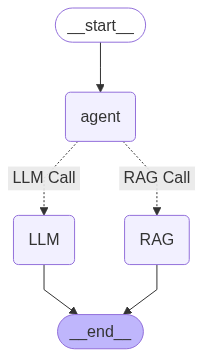

In [160]:
from IPython.display import Image, display

try:
    display(Image(app5.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [162]:
inputs = {"messages": ["Tell me which value is the india gdp value in 2021?"]}

In [163]:
output = app5.invoke(inputs)

Tell me which value is the india gdp value in 2021?
Topic='economy' Reasoning="The query asks for India's GDP value, which is an economic indicator."
-> Router ->
economy
-> Calling RAG ->


In [164]:
output

{'messages': ['Tell me which value is the india gdp value in 2021?',
  'economy',
  'The India GDP value in 2021 is $3,173.04B.  \n']}

In [170]:
inputs = {"messages": ["Tell me about first president of USA?"]}

In [171]:
output = app5.invoke(inputs)

Tell me about first president of USA?
Topic='Not Related' Reasoning='The query is about the first president of the USA, which is not related to India or its economy.'
-> Router ->
Not Related
-> Calling LLM ->


In [172]:
output

{'messages': ['Tell me about first president of USA?',
  'Not Related',
  'The first president of the United States of America was **George Washington**. \n\nHere are some key facts about him:\n\n* **Born:** February 22, 1732, in Westmoreland County, Virginia\n* **Military Leader:** He was a key figure in the American Revolutionary War, leading the Continental Army to victory against the British.\n* **Presidency:** Served two terms as president from 1789 to 1797.\n* **Founding Father:** Played a crucial role in shaping the new nation, including helping to draft the Constitution.\n* **Legacy:**  Considered the "Father of His Country" and is revered for his leadership, integrity, and commitment to democracy.\n\nWashington set many precedents for future presidents, including establishing the Cabinet and forming a strong executive branch. His presidency is often seen as a defining moment in the early history of the United States. \n\n\nWould you like to know more about a specific aspect of

# from here phase-5

In [2]:
import json
#from langchain_core.messages import ToolMessage
from langchain_core.tools import tool
from langchain_core.utils.function_calling import convert_to_openai_tool

In [6]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")
llm.invoke("hi").content

'Hello! 👋  How can I help you today? 😊\n'

In [7]:
@tool
def multiply(first_number: int, second_number: int):
    """Multiplies two numbers together."""
    return first_number * second_number

In [8]:
tools=[convert_to_openai_tool(multiply)]

In [9]:
model_with_tools = llm.bind(tools=tools)

In [10]:
response = model_with_tools.invoke('What is 35 * 46?')

In [11]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '1nay1h55p', 'function': {'arguments': '{"first_number":35,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 975, 'total_tokens': 1068, 'completion_time': 0.169090909, 'prompt_time': 0.018799565, 'queue_time': 0.253007695, 'total_time': 0.187890474}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--49ca86de-c739-4555-959e-5b473c9b0246-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 35, 'second_number': 46}, 'id': '1nay1h55p', 'type': 'tool_call'}], usage_metadata={'input_tokens': 975, 'output_tokens': 93, 'total_tokens': 1068})

In [12]:
tool_calls = response.additional_kwargs.get('tool_calls')

In [13]:
tool_calls

[{'id': '1nay1h55p',
  'function': {'arguments': '{"first_number":35,"second_number":46}',
   'name': 'multiply'},
  'type': 'function'}]

In [14]:
for tool_call in tool_calls:
    print('Function Name:',tool_call.get('function').get('name'))
    print('Function Arguments:',tool_call.get('function').get('arguments'))
    print(tool_call)

Function Name: multiply
Function Arguments: {"first_number":35,"second_number":46}
{'id': '1nay1h55p', 'function': {'arguments': '{"first_number":35,"second_number":46}', 'name': 'multiply'}, 'type': 'function'}


In [15]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage


class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [16]:
def invoke_model(state):
    messages = state['messages']
    question = messages[-1]   ## Fetching the user question
    return {"messages":[model_with_tools.invoke(question)]}

In [17]:
def invoke_tool(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    print(f"here is a tool_calls {tool_calls}")
    multiply_call = None

    for tool_call in tool_calls:
        if tool_call.get("function").get("name") == "multiply":
            multiply_call = tool_call

    if multiply_call is None:
        raise Exception("No adder input found.")

    res = multiply.invoke(
        json.loads(multiply_call.get("function").get("arguments"))
    )

    return {"messages" : [res]
    }

In [18]:
from langgraph.graph import StateGraph,END
workflow6 = StateGraph(AgentState) ### StateGraph with AgentState
workflow6.add_node("agent", invoke_model)
workflow6.add_node("tool", invoke_tool)
workflow6.add_edge("tool", END)
workflow6.set_entry_point("agent")

In [19]:
def router(state):
    tool_calls = state['messages'][-1].additional_kwargs.get("tool_calls", [])
    if len(tool_calls):
        return "multiply"
    else:
        return "end"

workflow6.add_conditional_edges("agent", router, {
    "multiply": "tool",
    "end": END,
})

In [20]:
app6 = workflow6.compile()

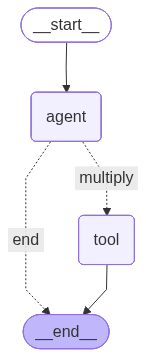

In [21]:
from IPython.display import Image, display

try:
    display(Image(app6.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [22]:
input1={"messages": ["What is 123 * 456?"]}

In [23]:

output = app6.invoke({"messages": ["What is 123 * 456?"]})

here is a tool_calls [{'id': 'nkbgdkkjf', 'function': {'arguments': '{"first_number":123,"second_number":456}', 'name': 'multiply'}, 'type': 'function'}]


In [24]:
output['messages'][-1]

56088

In [25]:
output = app6.invoke({"messages": ["What is LLM?"]})

here is a tool_calls [{'id': 'yn0ez84z5', 'function': {'arguments': '{"first_number":10,"second_number":2}', 'name': 'multiply'}, 'type': 'function'}]


In [26]:
print(output['messages'][-1])

20


In [27]:
input={"messages": ["What is LLM?"]}

In [28]:
for output in app6.stream(input1):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'mha1rzt8q', 'function': {'arguments': '{"first_number":123,"second_number":456}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 977, 'total_tokens': 1070, 'completion_time': 0.169090909, 'prompt_time': 0.020616873, 'queue_time': 0.251670656, 'total_time': 0.189707782}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5778f369-54d8-4496-8fa9-b4d2adffa646-0', tool_calls=[{'name': 'multiply', 'args': {'first_number': 123, 'second_number': 456}, 'id': 'mha1rzt8q', 'type': 'tool_call'}], usage_metadata={'input_tokens': 977, 'output_tokens': 93, 'total_tokens': 1070})]}


here is a tool_calls [{'id': 'mha1rzt8q', 'function': {'arguments': '{"first_number":123,"second_number":456}', 'name': 'multiply'},